##Box Spread 전략
Box Spread 전략은 동시에 Bull Call Spread와 Bear Put Spread를 구성하여 무위험 수익을 추구하는 전략입니다

[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-5e86b3dfbf11>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-1-5e86b3dfbf11>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Call Buy Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_low,
<ipython-input-1-5e86b3dfbf11>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

            Stock Price  Stock Return  Box Spread Profit  Box Spread Return
Date                                                                       
2023-01-03   125.070000      0.000000                6.0           0.000000
2023-01-04   126.360001      0.010314                6.0           0.047973
2023-01-05   125.019997     -0.010605                6.0           0.047483
2023-01-06   129.619995      0.036794                6.0           0.047992
2023-01-09   130.149994      0.004089                6.0           0.046289
...                 ...           ...                ...                ...
2023-12-22   193.600006     -0.005547                6.0           0.030820
2023-12-26   193.050003     -0.002841                6.0           0.030992
2023-12-27   193.149994      0.000518                6.0           0.031080
2023-12-28   193.580002      0.002226                6.0           0.031064
2023-12-29   192.529999     -0.005424                6.0           0.030995

[250 rows x

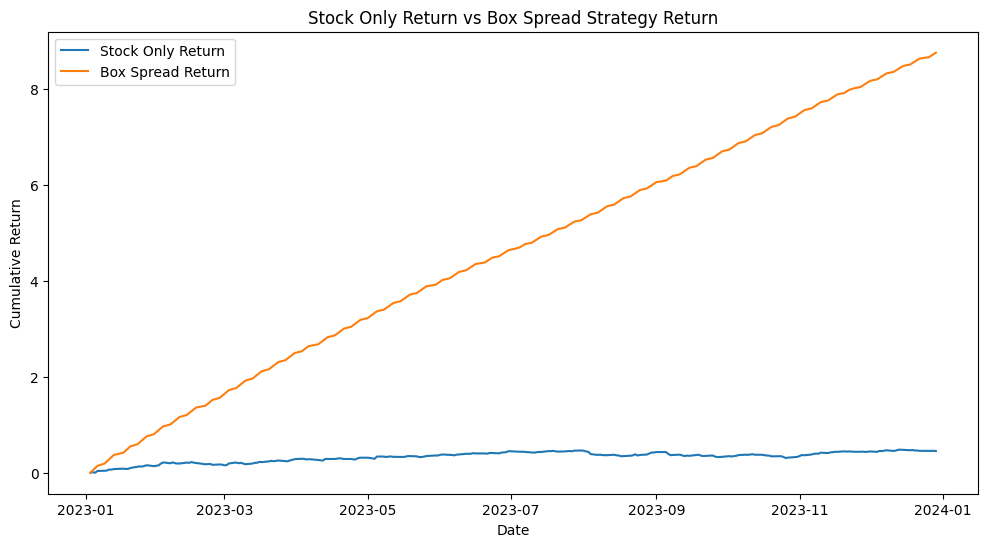

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Box Spread 설정
strike_price_low = 140
strike_price_high = 150
premium_paid_call = 5   # 낮은 행사가격의 콜 옵션 매수 시 지불한 프리미엄 (예시)
premium_received_call = 3  # 높은 행사가격의 콜 옵션 매도 시 받은 프리미엄 (예시)
premium_paid_put = 4  # 높은 행사가격의 풋 옵션 매수 시 지불한 프리미엄 (예시)
premium_received_put = 2  # 낮은 행사가격의 풋 옵션 매도 시 받은 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Box Spread 수익 계산 함수
def calculate_box_spread(stock_data, strike_price_low, strike_price_high, premium_paid_call, premium_received_call, premium_paid_put, premium_received_put):
    # 콜 옵션 손익 계산
    stock_data['Call Buy Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_low,
                                                  stock_data['Stock Price'] - strike_price_low,
                                                  0) - premium_paid_call
    stock_data['Call Sell Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_high,
                                                   strike_price_high - stock_data['Stock Price'],
                                                   0) + premium_received_call

    # 풋 옵션 손익 계산
    stock_data['Put Buy Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price_high,
                                                 strike_price_high - stock_data['Stock Price'],
                                                 0) - premium_paid_put
    stock_data['Put Sell Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price_low,
                                                  stock_data['Stock Price'] - strike_price_low,
                                                  0) + premium_received_put

    # Box Spread 전략의 총 수익 계산
    stock_data['Box Spread Profit'] = (stock_data['Call Buy Profit/Loss'] + stock_data['Call Sell Profit/Loss'] +
                                       stock_data['Put Buy Profit/Loss'] + stock_data['Put Sell Profit/Loss'])

    # 총 수익률 계산
    stock_data['Box Spread Return'] = stock_data['Box Spread Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Box Spread Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
box_spread_results = calculate_box_spread(data, strike_price_low, strike_price_high, premium_paid_call, premium_received_call, premium_paid_put, premium_received_put)

# 결과 출력
print(box_spread_results[['Stock Price', 'Stock Return', 'Box Spread Profit', 'Box Spread Return']])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(box_spread_results.index, box_spread_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(box_spread_results.index, box_spread_results['Box Spread Return'].cumsum(), label='Box Spread Return')
plt.title('Stock Only Return vs Box Spread Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
